In [16]:
#https://medium.com/analytics-vidhya/traffic-signs-recognition-for-self-driving-cars-6ee30f5dc952

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
# Importing dataset
import os
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [17]:
data = np.array(data)
labels = np.array(labels)

print("Dataset dimensions : ",data.shape)

Dataset dimensions :  (39209, 30, 30, 3)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_train shape : ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape :  (31367, 30, 30, 3)
X_test shape :  (7842, 30, 30, 3)
Y_train shape :  (31367,)
Y_test shape :  (7842,)


In [19]:
from keras.utils import to_categorical
Y_train_categorical = to_categorical(Y_train, 43)
Y_test_categorical = to_categorical(Y_test, 43)

Using TensorFlow backend.


Sign category : 3


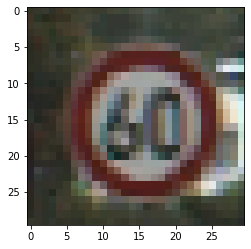

In [20]:
i = 100
plt.imshow(X_train[i])
print("Sign category :",Y_train[i])

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [24]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(X_train, Y_train_categorical, batch_size = 32, epochs = 15, validation_data = (X_test, Y_test_categorical))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 90s 3ms/step - loss: 1.1049 - accuracy: 0.6920 - val_loss: 0.3217 - val_accuracy: 0.9132
Epoch 2/15
31367/31367 [==============================] - 81s 3ms/step - loss: 0.4875 - accuracy: 0.8594 - val_loss: 0.2164 - val_accuracy: 0.9411
Epoch 3/15
31367/31367 [==============================] - 78s 2ms/step - loss: 0.3787 - accuracy: 0.8951 - val_loss: 0.1983 - val_accuracy: 0.9537
Epoch 4/15
31367/31367 [==============================] - 77s 2ms/step - loss: 0.3350 - accuracy: 0.9054 - val_loss: 0.1457 - val_accuracy: 0.9605
Epoch 5/15
31367/31367 [==============================] - 82s 3ms/step - loss: 0.3115 - accuracy: 0.9108 - val_loss: 0.1493 - val_accuracy: 0.9535
Epoch 6/15
31367/31367 [==============================] - 79s 3ms/step - loss: 0.3034 - accuracy: 0.9135 - val_loss: 0.1619 - val_accuracy: 0.9498
Epoch 7/15
31367/31367 [==============================] - 80s 3ms/ste

In [25]:
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

KeyError: 'acc'

In [ ]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

pred = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(labels, pred))